# UK Covid Cases Analysis

### Installation of Pandas and Upload of the data file

In [2]:
!pip install pandas
!pip install numpy

#Importing the pandas and numpy libraries
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)

# Extract the file containing UK Covid Cases data
uk_cases=pd.read_csv("/Users/shaunman/Documents/LSE/Course 2/Course 2 Final/LSE_DA201_Assignment_files/covid_19_uk_cases.csv")


### Printing the first and last 5 rows as well as the shape of the dataframe

In [3]:
# First Five Rows
print(uk_cases.head())

# Last five rows
print(uk_cases.tail())

# No of rows and columns within the dataframe 
print(uk_cases.shape)

uk_cases.describe()








  Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
1       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
2       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
3       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
4       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Caribbean                        29  2020-01-22   
1  Latin America and the Caribbean                        29  2020-01-23   
2  Latin America and the Caribbean                        29  2020-01-24   
3  Latin America and the Caribbean                        29  2020-01-25   
4  Latin America and the Caribbean                        29  2020-01-26   

   Deaths  Cases  Recovered  Hospitalised  
0     0.0    0.0        

,Lat,Long,Intermediate Region Code,Deaths,Cases,Recovered,Hospitalised
count,7584.000000,7584.000000,7584.000000,7582.000000,7.582000e+03,7582.000000,7582.000000
mean,21.840267,-41.440047,12.500000,6210.202321,2.147082e+05,454.691242,685.228568
std,28.305518,30.527529,14.009849,24860.790148,1.007557e+06,1010.642337,819.256635
min,-51.796300,-81.254600,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,17.851075,-64.667625,0.000000,0.000000,1.200000e+01,0.000000,105.000000
50%,20.503650,-60.855483,2.500000,1.000000,1.685000e+02,13.000000,390.000000
75%,39.448675,-5.152225,29.000000,25.000000,1.585000e+03,312.000000,955.750000
max,55.378100,-2.364400,29.000000,138237.000000,8.317439e+06,8322.000000,4907.000000


### Identifying and filtering out the missing values from the dataframe

In [190]:
# Number of missing values
print(uk_cases.isna().any(axis=1).sum())

# Printing the rows containing the missing values
missing_cases=uk_cases[uk_cases.isna().any(axis=1)]
print(missing_cases)

# Filtered out those rows containing NaN values
filter_cases=uk_cases.dropna()


2
    Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
875        Bermuda  United Kingdom  32.3078 -64.7505                      BMU   
876        Bermuda  United Kingdom  32.3078 -64.7505                      BMU   

      Sub-region Name  Intermediate Region Code        Date  Deaths  Cases  \
875  Northern America                         0  2020-09-21     NaN    NaN   
876  Northern America                         0  2020-09-22     NaN    NaN   

     Recovered  Hospitalised  
875        NaN           NaN  
876        NaN           NaN  


### Filtering & Subsetting the data for Cases within Gibraltar

In [191]:
# Filtering results of Gibraltar from the data
gibr_cases = filter_cases[filter_cases['Province/State'] == 'Gibraltar']
gibr_cases

# Subsetting the Dataframe to display the following columns: Deaths, Cases, Recovered and Hospitalised
gb_sub=gibr_cases[['Date','Cases', 'Deaths', 'Recovered', 'Hospitalised']]
gb_sub.describe().apply(lambda s: s.apply('{0:.5f}'.format))







,Cases,Deaths,Recovered,Hospitalised
count,632.00000,632.00000,632.00000,632.00000
mean,2237.10918,40.20886,1512.82120,1027.62500
std,2136.26809,45.33283,1817.09675,1145.68106
min,0.00000,0.00000,0.00000,0.00000
25%,177.00000,0.00000,109.50000,157.75000
50%,1036.50000,5.00000,323.50000,675.50000
75%,4286.00000,94.00000,4122.50000,1548.00000
max,5727.00000,97.00000,4670.00000,4907.00000


### Importing the files containing UK Vaccination data

In [192]:
# Extract the file containing Vaccination Data
cov_vac=pd.read_csv("/Users/shaunman/Documents/LSE/Course 2/Course 2 Final/LSE_DA201_Assignment_files/covid_19_uk_vaccinated.csv")


### Merge list of UK Covid Cases and UK Vaccination Data

In [193]:
# Merge 2 dataframes with use of outerjoin.
uk_vac=pd.merge(uk_cases,cov_vac,how='outer')
print(uk_vac.shape)


(7584, 15)


### Missing Values filtered from Dataframe

In [194]:
# Number of missing values
print(uk_vac.isna().any(axis=1).sum())

# Filtered out those rows containing NaN values
ukvac_cases=uk_vac.dropna()

2


In [195]:
# Comparing the output of Vaccinated column and Second Dose column
print(sum(ukvac_cases['Vaccinated']-ukvac_cases['Second Dose']))

#The output generated reveals that they are the same.
#Hence, invidivuals are considered Vaccinated if they have received 2nd dose and these columns can be substituted.

ukvac_cases.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7582 entries, 0 to 7583
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7582 non-null   object 
 1   Country/Region            7582 non-null   object 
 2   Lat                       7582 non-null   float64
 3   Long                      7582 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7582 non-null   object 
 5   Sub-region Name           7582 non-null   object 
 6   Intermediate Region Code  7582 non-null   int64  
 7   Date                      7582 non-null   object 
 8   Deaths                    7582 non-null   float64
 9   Cases                     7582 non-null   float64
 10  Recovered                 7582 non-null   float64
 11  Hospitalised              7582 non-null   float64
 12  Vaccinated                7582 non-null   int64  
 13  First Dose                7582 non-null   int64  
 14  Second

In [196]:
# Filtering out extra columns from the dataframe
ukvac=ukvac_cases[['Province/State','Date','Deaths','Recovered','First Dose','Second Dose']]


# Print shape of the new dataframe
print(ukvac.shape)

(7582, 6)


### Converting the data type from object to Date

In [197]:
# Import the datetime module and datetime class.
from datetime import datetime

# Current date and time .
now = datetime.now() 
print('Current time', now)

# Converting the data type of the Date Column from object to Date 
ukvac['Date']=pd.to_datetime(ukvac['Date'],format='%Y-%m-%d')
ukvac.info()


Current time 2022-07-10 14:13:29.679029
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7582 entries, 0 to 7583
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  7582 non-null   object        
 1   Date            7582 non-null   datetime64[ns]
 2   Deaths          7582 non-null   float64       
 3   Recovered       7582 non-null   float64       
 4   First Dose      7582 non-null   int64         
 5   Second Dose     7582 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 414.6+ KB


In [198]:

# Creating column containing those individual who have received only the first dose
ukvac['dose1_nodose2']=ukvac['First Dose'] - ukvac['Second Dose']
ukvac['total_dose']=ukvac['First Dose'] + ukvac['Second Dose']
ukvac['month_year']=ukvac['Date'].dt.to_period('M')


In [199]:
# Group by Province/State
state_group=ukvac.groupby('Province/State')

# Group by First Dose Vaccinated 
firstdose_group=ukvac.groupby('First Dose')

# Group by Second Dose Vaccinated 
seconddose_group=ukvac.groupby('Second Dose')


In [200]:
# 3.4.a Province/State having the highest number of individuals with a first dose but not a second dose
prov=state_group.sum().sort_values('dose1_nodose2',ascending=False)
prov

,Deaths,Recovered,First Dose,Second Dose,dose1_nodose2,total_dose
Province/State,,,,,,
Gibraltar,25412.0,956103.0,5870786,5606041,264745,11476827
Montserrat,539.0,6376.0,5401128,5157560,243568,10558688
British Virgin Islands,3573.0,64359.0,5166303,4933315,232988,10099618
Anguilla,24.0,12708.0,4931470,4709072,222398,9640542
Isle of Man,15051.0,328319.0,4226984,4036345,190639,8263329
Falkland Islands (Malvinas),0.0,14754.0,3757307,3587869,169438,7345176
Cayman Islands,911.0,152052.0,3522476,3363624,158852,6886100
Channel Islands,37130.0,1027626.0,3287646,3139385,148261,6427031
Turks and Caicos Islands,5612.0,515923.0,3052822,2915136,137686,5967958


In [201]:
#3.4.b Province/State having the highest percentage of individuals with a first dose but not a second dose.

prov['dose1_perc']=(prov['dose1_nodose2']*100)/prov['total_dose']
prov.sort_values('dose1_perc',ascending=False)


,Deaths,Recovered,First Dose,Second Dose,dose1_nodose2,total_dose,dose1_perc
Province/State,,,,,,,
Turks and Caicos Islands,5612.0,515923.0,3052822,2915136,137686,5967958,2.307087
Isle of Man,15051.0,328319.0,4226984,4036345,190639,8263329,2.307048
Anguilla,24.0,12708.0,4931470,4709072,222398,9640542,2.306903
British Virgin Islands,3573.0,64359.0,5166303,4933315,232988,10099618,2.306899
Cayman Islands,911.0,152052.0,3522476,3363624,158852,6886100,2.306850
Channel Islands,37130.0,1027626.0,3287646,3139385,148261,6427031,2.306835
Montserrat,539.0,6376.0,5401128,5157560,243568,10558688,2.306802
Falkland Islands (Malvinas),0.0,14754.0,3757307,3587869,169438,7345176,2.306793
Gibraltar,25412.0,956103.0,5870786,5606041,264745,11476827,2.306779


In [202]:
# Group by Date
timegroup=ukvac.groupby('month_year')

#3.4.c How has the number of vaccinated individuals and individuals \n
# received the first and second doses, changed over time?

vac_time=timegroup.sum()
vac_time


,Deaths,Recovered,First Dose,Second Dose,dose1_nodose2,total_dose
month_year,,,,,,
2020-01,0.0,0.0,0,0,0,0
2020-02,0.0,116.0,0,0,0,0
2020-03,12580.0,1929.0,0,0,0,0
2020-04,457216.0,14880.0,0,0,0,0
2020-05,1030749.0,32790.0,0,0,0,0
2020-06,1182674.0,38818.0,0,0,0,0
2020-07,1270661.0,43441.0,0,0,0,0
2020-08,1284798.0,46765.0,0,0,0,0
2020-09,1254487.0,61958.0,0,0,0,0


### Assignment Activity 4: Visualise and identify initial trends

In [203]:
ukvac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7582 entries, 0 to 7583
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  7582 non-null   object        
 1   Date            7582 non-null   datetime64[ns]
 2   Deaths          7582 non-null   float64       
 3   Recovered       7582 non-null   float64       
 4   First Dose      7582 non-null   int64         
 5   Second Dose     7582 non-null   int64         
 6   dose1_nodose2   7582 non-null   int64         
 7   total_dose      7582 non-null   int64         
 8   month_year      7582 non-null   period[M]     
dtypes: datetime64[ns](1), float64(2), int64(4), object(1), period[M](1)
memory usage: 592.3+ KB


In [293]:
#Importing the matplotlib and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [290]:
# 4.a Objective: To visualise the  number of individuals who have received a second dose compared to individuals \
# who have received their first dose in each area.

#Created a dataframe containing the necessary columns.
b1=prov[['First Dose','Second Dose']]

# Assigning Column Name to the Columns
b1.columns.name='Dose Type'

# Stacking the Dataframe to achieve new dataframe suitable for plotting
b2=b1.stack().reset_index()

# Renaming the column 0 which has been generated containing the Number of Doses provided.
b2.rename(columns={0:'Doses Provided'},inplace=True)
b2


,Province/State,Dose Type,Doses Provided
0,Gibraltar,First Dose,5870786
1,Gibraltar,Second Dose,5606041
2,Montserrat,First Dose,5401128
3,Montserrat,Second Dose,5157560
4,British Virgin Islands,First Dose,5166303
5,British Virgin Islands,Second Dose,4933315
6,Anguilla,First Dose,4931470
7,Anguilla,Second Dose,4709072
8,Isle of Man,First Dose,4226984
9,Isle of Man,Second Dose,4036345


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Gibraltar'),
  Text(1, 0, 'Montserrat'),
  Text(2, 0, 'British Virgin Islands'),
  Text(3, 0, 'Anguilla'),
  Text(4, 0, 'Isle of Man'),
  Text(5, 0, 'Falkland Islands (Malvinas)'),
  Text(6, 0, 'Cayman Islands'),
  Text(7, 0, 'Channel Islands'),
  Text(8, 0, 'Turks and Caicos Islands'),
  Text(9, 0, 'Bermuda'),
  Text(10, 0, 'Others'),
  Text(11, 0, 'Saint Helena, Ascension and Tristan da Cunha')])

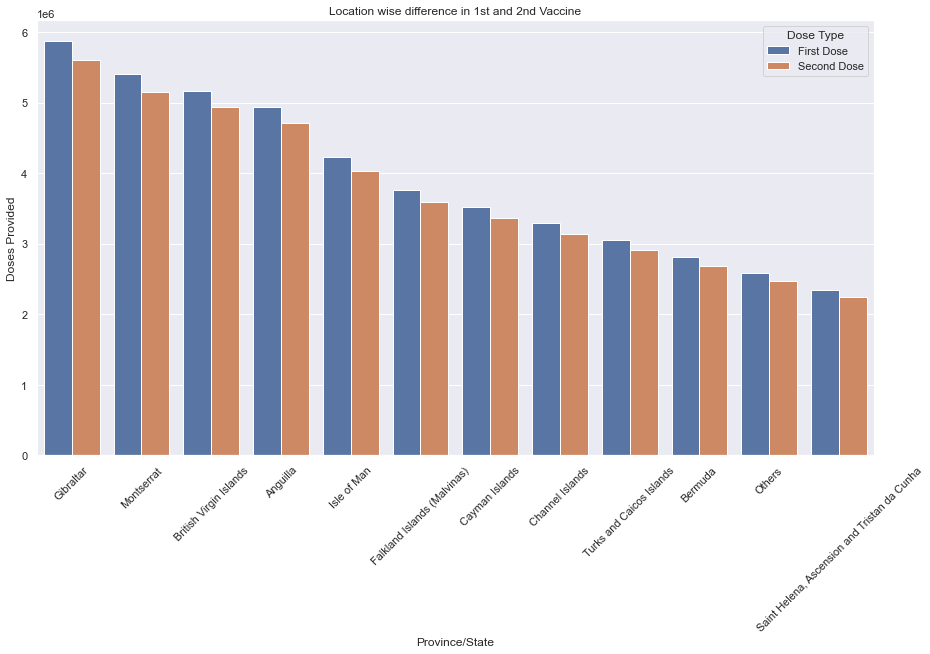

In [412]:
#Assign the size of the plot to be generated
sns.set(rc={'figure.figsize':(15, 8)})

#4.a-Creating a barplot visualizing area wise comparison of Vaccines provided
bar1=sns.barplot(x='Province/State',y='Doses Provided',hue='Dose Type',data=bar2)

#Assigning Title to the barplot
bar1.set_title("Location wise difference in 1st and 2nd Vaccine")

# Assigning rotation to the x axis labels to provide clear view of labels.
plt.xticks(rotation=45)

In [414]:
#Save figure as PNG
fig = bar1.get_figure()
fig.savefig('/Users/shaunman/Desktop/Location_based_Vaccine_Dosage.png')

In [360]:
#4.b Objective:Create a visualisation that communicates the number of deaths per month in each region
#Group by Date and Province/State
death_df=ukvac[['Province/State','Deaths','month_year']]
prov_date=death_df.groupby(['month_year','Province/State']).sum().reset_index()
prov_date

,month_year,Province/State,Deaths
0,2020-01,Anguilla,0.0
1,2020-01,Bermuda,0.0
2,2020-01,British Virgin Islands,0.0
3,2020-01,Cayman Islands,0.0
4,2020-01,Channel Islands,0.0
...,...,...,...
259,2021-10,Isle of Man,744.0
260,2021-10,Montserrat,14.0
261,2021-10,Others,1924499.0
262,2021-10,"Saint Helena, Ascension and Tristan da Cunha",0.0


In [363]:
#Pivot the table to create a more readable format of the deaths across all regions
lineplot_a=prov_date.pivot_table(index='month_year', columns='Province/State', values='Deaths').reset_index()
lineplot_a

Province/State,month_year,Anguilla,Bermuda,British Virgin Islands,Cayman Islands,Channel Islands,Falkland Islands (Malvinas),Gibraltar,Isle of Man,Montserrat,Others,"Saint Helena, Ascension and Tristan da Cunha",Turks and Caicos Islands
0,2020-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03,0.0,0.0,0.0,16.0,10.0,0.0,0.0,0.0,0.0,12550.0,4.0,0.0
3,2020-04,0.0,117.0,12.0,30.0,554.0,0.0,0.0,228.0,7.0,456242.0,0.0,26.0
4,2020-05,0.0,255.0,31.0,31.0,1332.0,0.0,0.0,727.0,31.0,1028311.0,0.0,31.0
5,2020-06,0.0,270.0,30.0,30.0,1414.0,0.0,0.0,720.0,30.0,1180149.0,0.0,31.0
6,2020-07,0.0,279.0,31.0,31.0,1457.0,0.0,0.0,744.0,31.0,1268026.0,0.0,62.0
7,2020-08,0.0,279.0,31.0,31.0,1470.0,0.0,0.0,744.0,31.0,1282143.0,0.0,69.0
8,2020-09,0.0,252.0,30.0,30.0,1440.0,0.0,0.0,720.0,30.0,1251835.0,0.0,150.0
9,2020-10,0.0,279.0,31.0,31.0,1488.0,0.0,0.0,744.0,31.0,1355504.0,0.0,186.0


Text(0, 0.5, 'Deaths')

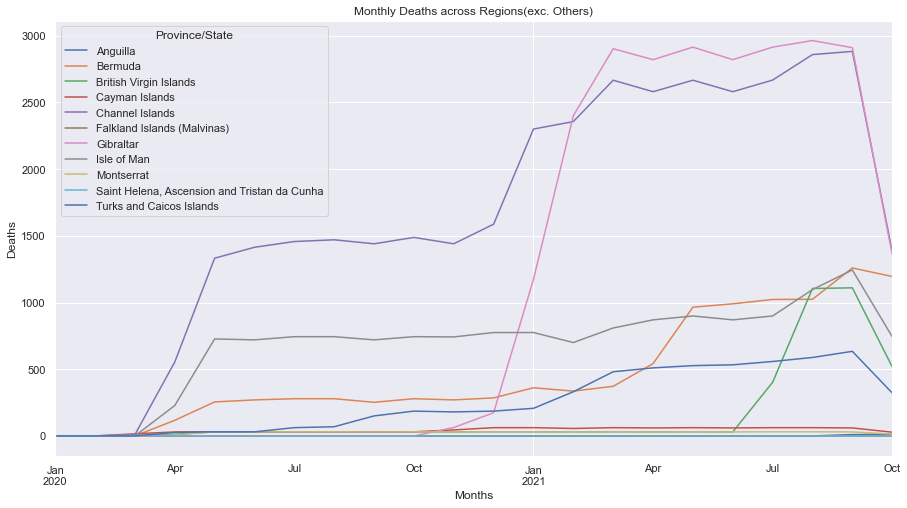

In [394]:
# As the data for others is too large, we can remove it for our comparison

#Setting the size of the lineplot
sns.set(rc={'figure.figsize':(15, 8)})

# 4.b: Creation of lineplot displaying the monthly deaths in across all regions except others
line1=lineplot_a.plot(x='month_year',y=['Anguilla','Bermuda','British Virgin Islands', 'Cayman Islands',
                                     'Channel Islands','Falkland Islands (Malvinas)','Gibraltar',\
                                     'Isle of Man','Montserrat',\
                                  'Saint Helena, Ascension and Tristan da Cunha','Turks and Caicos Islands'])

#Assigning title and labels to the barplot
line1.set_title("Monthly Deaths across Regions(exc. Others)")
line1.set_xlabel("Months")
line1.set_ylabel("Deaths")

In [401]:
#Save figure as PNG
fig = line1.get_figure()
fig.savefig('/Users/shaunman/Desktop/Monthly Deaths displaying across regions.png')

In [396]:
#4.c Objective:Create a visualisation that communicates which region has the greatest number of recoveries. 
#Group by Date and Province/State
rec_a=ukvac[['Province/State','Recovered','month_year']]
rec_b=rec_a.groupby(['month_year','Province/State']).sum().reset_index()
rec_b

,month_year,Province/State,Recovered
0,2020-01,Anguilla,0.0
1,2020-01,Bermuda,0.0
2,2020-01,British Virgin Islands,0.0
3,2020-01,Cayman Islands,0.0
4,2020-01,Channel Islands,0.0
...,...,...,...
259,2021-10,Isle of Man,0.0
260,2021-10,Montserrat,0.0
261,2021-10,Others,0.0
262,2021-10,"Saint Helena, Ascension and Tristan da Cunha",0.0


In [397]:
#Pivot the table to create a more readable format of the deaths across all regions
lineplot_b=rec_b.pivot_table(index='month_year', columns='Province/State', values='Recovered').reset_index()
lineplot_b

Province/State,month_year,Anguilla,Bermuda,British Virgin Islands,Cayman Islands,Channel Islands,Falkland Islands (Malvinas),Gibraltar,Isle of Man,Montserrat,Others,"Saint Helena, Ascension and Tristan da Cunha",Turks and Caicos Islands
0,2020-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,0.0,0.0
2,2020-03,0.0,20.0,0.0,0.0,0.0,0.0,153.0,0.0,0.0,1752.0,4.0,0.0
3,2020-04,26.0,908.0,51.0,174.0,4129.0,113.0,2833.0,4328.0,31.0,2247.0,0.0,40.0
4,2020-05,93.0,2240.0,155.0,1497.0,14511.0,403.0,4430.0,8927.0,263.0,0.0,0.0,271.0
5,2020-06,90.0,3773.0,210.0,3895.0,15392.0,390.0,5080.0,9358.0,300.0,0.0,0.0,330.0
6,2020-07,93.0,4273.0,217.0,6162.0,16180.0,403.0,5531.0,9672.0,310.0,0.0,0.0,600.0
7,2020-08,93.0,4557.0,231.0,6262.0,16787.0,403.0,6088.0,9672.0,358.0,0.0,0.0,2314.0
8,2020-09,90.0,4548.0,1059.0,6144.0,17345.0,390.0,9022.0,9375.0,356.0,0.0,44.0,13585.0
9,2020-10,93.0,5342.0,2147.0,6604.0,20017.0,403.0,14054.0,9882.0,372.0,0.0,62.0,20940.0


Text(0, 0.5, 'Deaths')

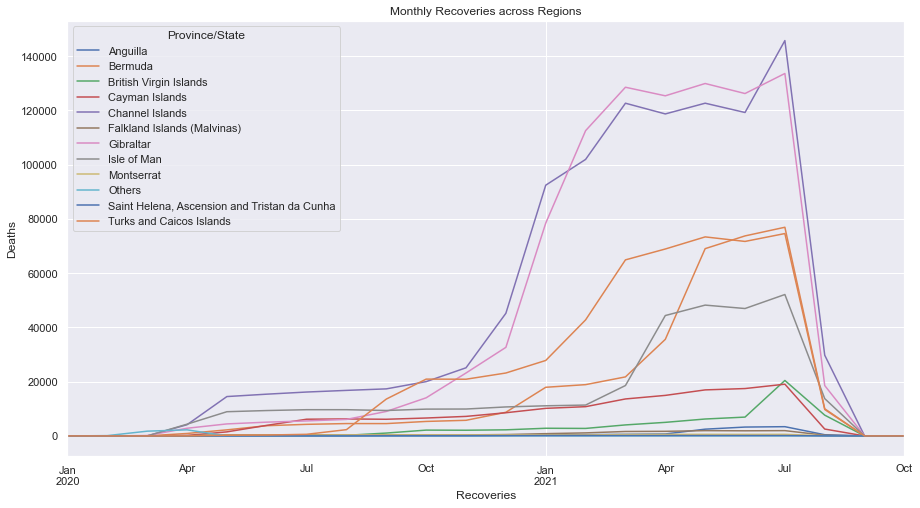

In [398]:
#Unlike before, the value of 'Others' region is included as the number is within an acceptable range
#Setting the size of the lineplot
sns.set(rc={'figure.figsize':(15, 8)})

# 4.c: Creation of lineplot displaying the monthly recoveries in across all regions except others
line2=lineplot_b.plot(x='month_year',y=['Anguilla','Bermuda','British Virgin Islands', 'Cayman Islands',
                                     'Channel Islands','Falkland Islands (Malvinas)','Gibraltar',\
                                     'Isle of Man','Montserrat','Others',\
                                  'Saint Helena, Ascension and Tristan da Cunha','Turks and Caicos Islands'])

#Assigning title and labels to the barplot
line2.set_title("Monthly Recoveries across Regions")
line2.set_xlabel("Recoveries")
line2.set_ylabel("Deaths")

In [400]:
#Save figure as PNG
fig = line2.get_figure()
fig.savefig('/Users/shaunman/Desktop/Monthly Recoveries across all regions.png')